In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading The data:

In [5]:
transaction_df = pd.read_csv("transaction_data.csv")

In [6]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
transaction_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [10]:
purchase_behaviour_df = pd.read_csv("purchase_behaviour.csv")

In [11]:
purchase_behaviour_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [13]:
purchase_behaviour_df.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

### The feature "LYLTY_CARD_NBR" is in both the datasets so using it for merging.

In [15]:
df = transaction_df.merge(purchase_behaviour_df, on='LYLTY_CARD_NBR')

print("\nMerged Data Preview:")
df.head()


Merged Data Preview:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


## Assuming 'TOT_SALES' represents the sales amount finding most profitable products:

In [16]:
profit_by_product = df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Sort products by total sales in descending order
profit_by_product.sort_values(by='TOT_SALES', ascending=False, inplace=True)

# Extract the top 3 products
top3_products = profit_by_product.head(3)
print("\nTop 3 Most Profitable Products:")
print(top3_products)


Top 3 Most Profitable Products:
                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g    40352.0
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
77  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


## Contribution of top 3 most profitable products in total sales:

In [30]:
# Calculate total sales across all products
total_sales = df['TOT_SALES'].sum()

# Calculate contribution of top 3 products
top3_sales = top3_products['TOT_SALES'].sum()
contribution_percentage = (top3_sales / total_sales) * 100

print(f"The top 3 products contribute {contribution_percentage:.2f}% to the total sales.")

The top 3 products contribute 5.77% to the total sales.


## Plotting the top 3 products

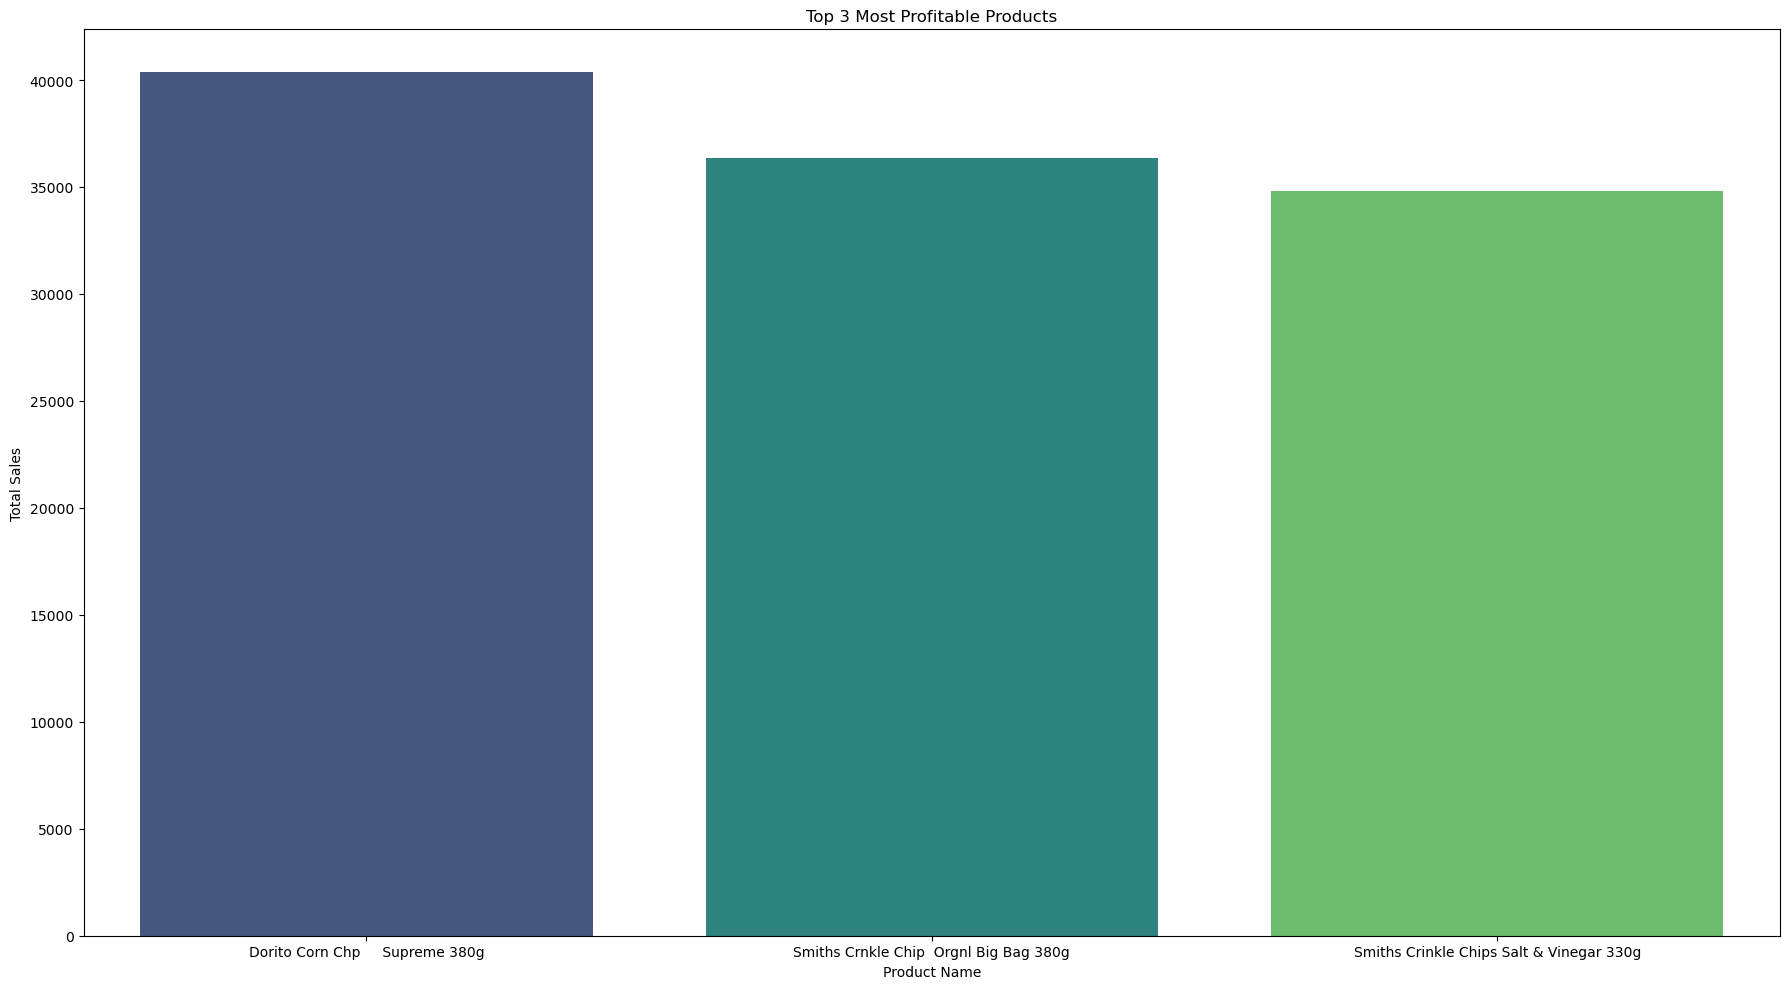

In [20]:
plt.figure(figsize=(18, 10))
sns.barplot(x='PROD_NAME', y='TOT_SALES', data=top3_products, palette="viridis")
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

In [ ]:
# --------------------------
# 4. Identifying Loyal Customers with assuming them as Loyan when They have bought more than x products. say (x = 10)

In [26]:
# Define "loyal" customers based on transaction frequency
customer_data = df.groupby('LYLTY_CARD_NBR').agg({
    'TXN_ID': 'count',               # Count of transactions
    'TOT_SALES': 'sum',              # Total amount spent
    'LIFESTAGE': 'first',            # Assuming these values remain consistent per customer
    'PREMIUM_CUSTOMER': 'first'      # Assuming these values remain consistent per customer
}).rename(columns={'TXN_ID': 'transaction_count'})

# Define loyal customers as those with more than a set number of transactions
loyal_threshold = 10
loyal_customers = customer_data[customer_data['transaction_count'] > loyal_threshold]

print("\nNumber of Loyal Customers:", loyal_customers.shape[0])
print("Sample Loyal Customers:")
loyal_customers.head()


Number of Loyal Customers: 1220
Sample Loyal Customers:


,transaction_count,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
LYLTY_CARD_NBR,,,,
3153,13,116.4,MIDAGE SINGLES/COUPLES,Premium
4046,11,82.4,OLDER FAMILIES,Mainstream
4233,12,107.2,OLDER FAMILIES,Mainstream
5025,14,94.5,YOUNG FAMILIES,Premium
5034,12,94.7,YOUNG FAMILIES,Premium


## Analyzing customer attributes like LIFESTAGE and PREMIUM_CUSTOMER:

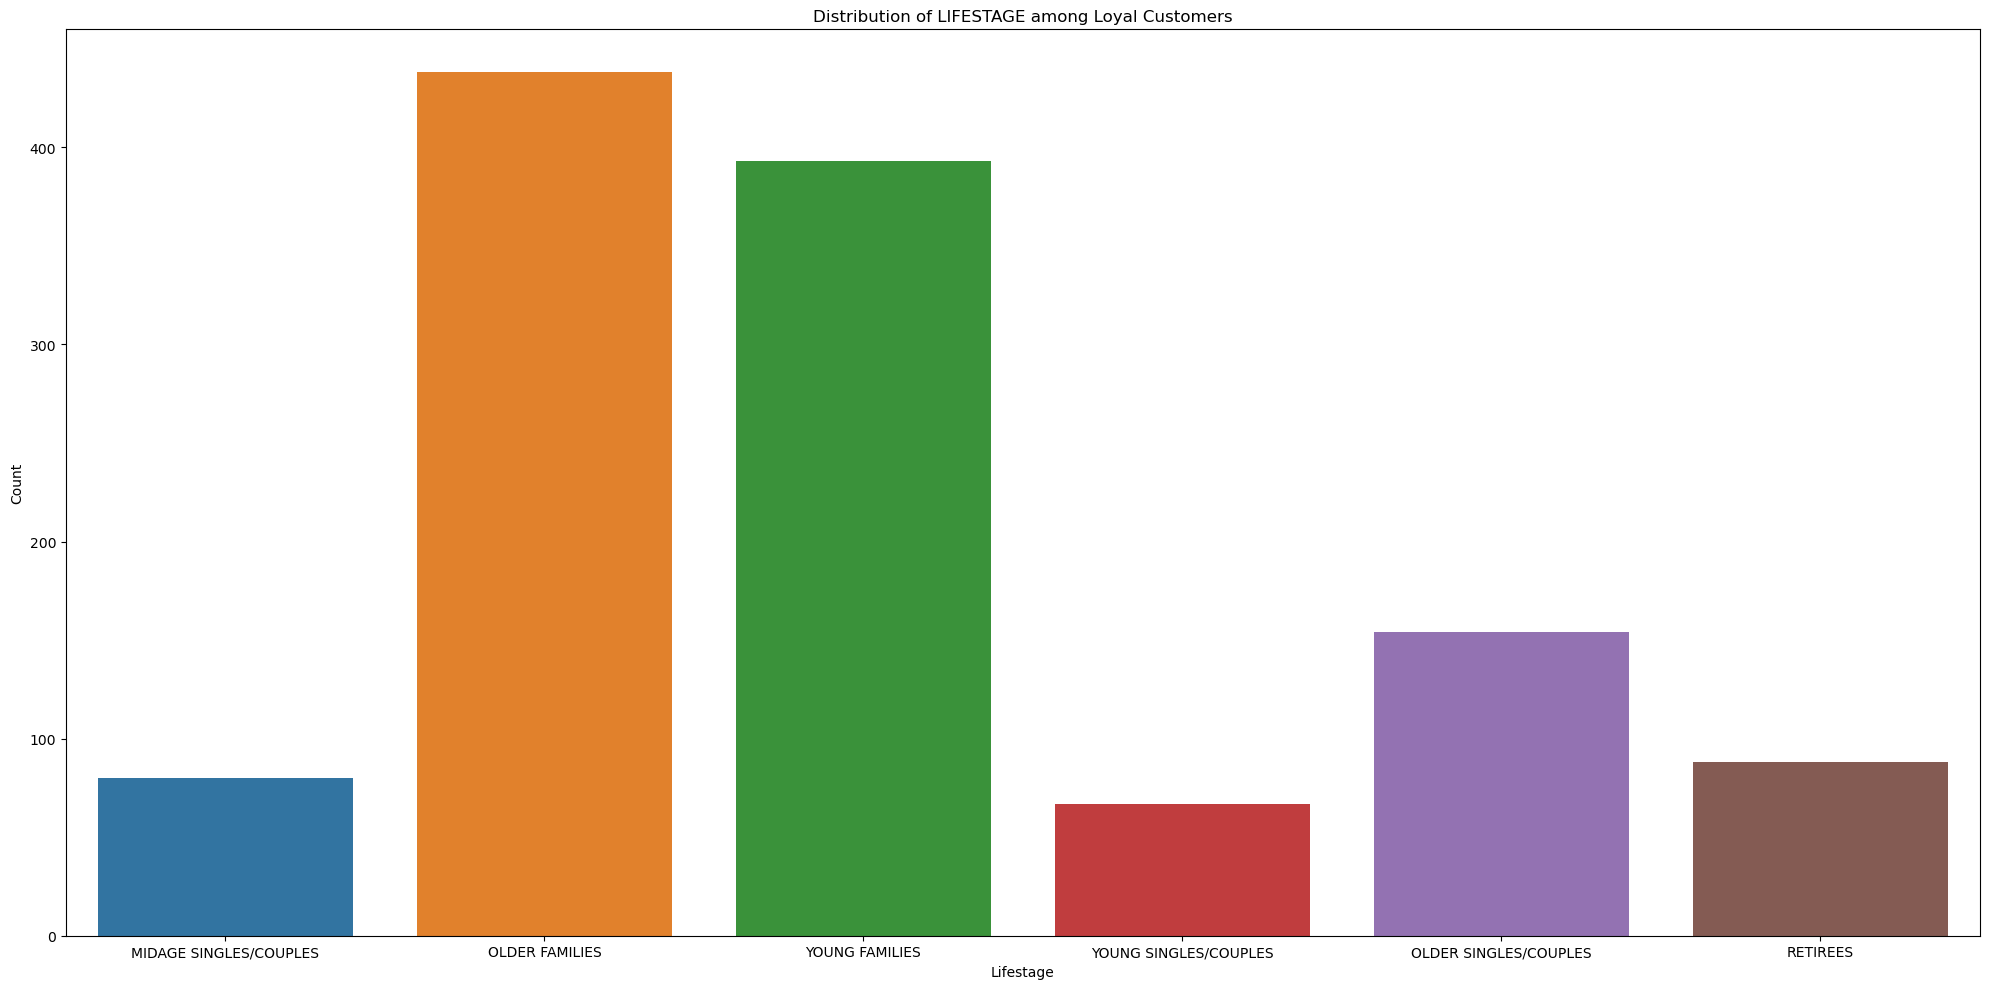

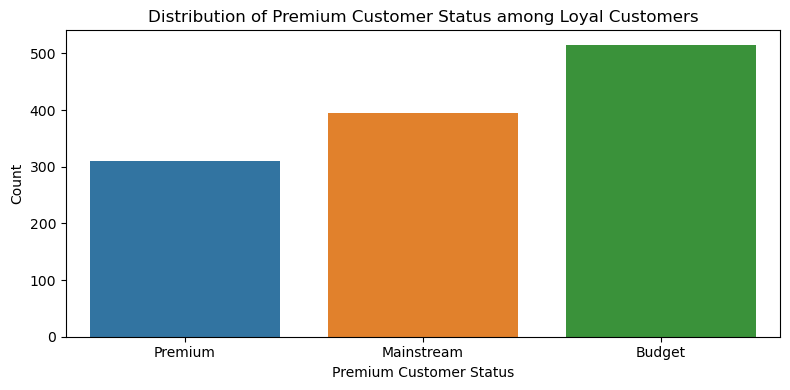

In [27]:
# Plotting: Distribution of LIFESTAGE
plt.figure(figsize=(20, 10))
sns.countplot(x='LIFESTAGE', data=loyal_customers)
plt.title("Distribution of LIFESTAGE among Loyal Customers")
plt.xlabel("Lifestage")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plotting: Distribution of PREMIUM_CUSTOMER
plt.figure(figsize=(8, 4))
sns.countplot(x='PREMIUM_CUSTOMER', data=loyal_customers)
plt.title("Distribution of Premium Customer Status among Loyal Customers")
plt.xlabel("Premium Customer Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [31]:
# Group loyal customers by LIFESTAGE to identify the most common group
loyal_customer_marital_trends = purchase_behaviour_df.merge(
    transaction_df[['LYLTY_CARD_NBR', 'TOT_SALES']], 
    on='LYLTY_CARD_NBR'
).groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False)

print(loyal_customer_marital_trends)


LIFESTAGE
OLDER SINGLES/COUPLES     402426.75
RETIREES                  366470.90
OLDER FAMILIES            353767.20
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES               50433.45
Name: TOT_SALES, dtype: float64


## Printing Summary Statistics of Loyal Customers:

In [28]:
loyal_demo_summary = loyal_customers[['LIFESTAGE', 'PREMIUM_CUSTOMER']].describe(include='all')
print("\nLoyal Customer Demographics Summary:")
print(loyal_demo_summary)


Loyal Customer Demographics Summary:
             LIFESTAGE PREMIUM_CUSTOMER
count             1220             1220
unique               6                3
top     OLDER FAMILIES           Budget
freq               438              515


## Hypothesis Comments:

### 1. Top 3 Profitable Products: The top 3 bestselling products contribute 5.77% to the total sales, highlighting their consistent popularity and strong appeal among customers.

### 2. Premium Customers Drive Revenue: Premium customers represent a significant portion of the loyal customer base and spend more per transaction. Offering exclusive deals or loyalty rewards can further enhance their engagement and retention.

### 3. Loyal Customers’ Lifestage: The most loyal customers are primarily from the "Older Singles/Couples" segment, contributing the highest sales (₹402,426.75), followed by "Retirees" (₹366,470.90) and "Older Families" (₹353,767.20). This suggests that older customers, both individuals and families, prefer consistent and reliable products, making them a key segment to target.